In [111]:
# import the necessary libraries
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import linear_model
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import re

from collections import Counter

!pip install textblob

from textblob import TextBlob




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Week 1

In [6]:
Lego = pd.read_csv("lego.csv")

In [7]:
#View Data is Imported correctly; View head/tail

print(Lego.head())
print(Lego.tail())

   ages  list_price  num_reviews  piece_count  play_star_rating  \
0    19       29.99            2          277               4.0   
1    19       19.99            2          168               4.0   
2    19       12.99           11           74               4.3   
3     5       99.99           23         1032               3.6   
4     5       79.99           14          744               3.2   

   review_difficulty  country  
0                  0       20  
1                  2       20  
2                  2       20  
3                  0       20  
4                  1       20  
       ages  list_price  num_reviews  piece_count  play_star_rating  \
12256    23     36.5878            6          341               4.4   
12257    23     24.3878            8          217               4.1   
12258    23     24.3878           18          233               4.6   
12259    20     12.1878            1           48               5.0   
12260    20     12.1878           11          109 

In [8]:
#View Data Types

print(Lego.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB
None


In [9]:
#View shape of data set
print(Lego.shape)

(12261, 7)


In [10]:
#Find Missing Values

Lego_na = Lego[Lego.isna().any(axis=1)]
print(Lego_na.shape)

(0, 7)


In [11]:
#View Max/Minimum values
print(Lego.max())
print(Lego.min())

ages                   30.00
list_price           1104.87
num_reviews           367.00
piece_count          7541.00
play_star_rating        5.00
review_difficulty       5.00
country                20.00
dtype: float64
ages                 0.0000
list_price           2.2724
num_reviews          0.0000
piece_count          1.0000
play_star_rating     0.0000
review_difficulty    0.0000
country              0.0000
dtype: float64


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30')]

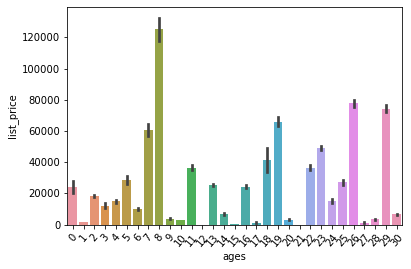

In [12]:
#Add title/legends

plt = sns.barplot(x="ages", y="list_price", estimator=sum, data=Lego)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 50)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30')]

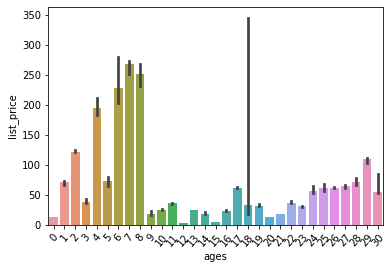

In [13]:
plt2 = sns.barplot(x="ages", y="list_price", estimator= np.median, data=Lego)
plt2.set_xticklabels(plt2.get_xticklabels(),rotation = 50)

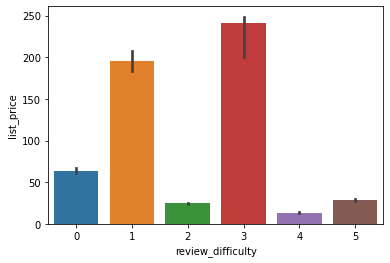

In [14]:
plt3 = sns.barplot(x="review_difficulty", y="list_price", estimator= np.median, data=Lego)

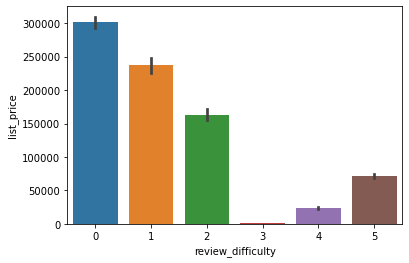

In [15]:
plt3 = sns.barplot(x="review_difficulty", y="list_price", estimator= sum, data=Lego)

In [16]:
#Simple linear regression

In [17]:
# dependent variable
z = Lego['list_price'].values.reshape(-1, 1)  
 # independent variable
W = Lego['piece_count'].values.reshape(-1, 1) 

In [18]:
#Create and fit linear regression model, call predictions for X based on linear regression model
mlr = linear_model.LinearRegression()
mlr.fit(W, z)
mlr.predict(W)

array([[44.16935263],
       [33.6057859 ],
       [24.49592101],
       ...,
       [39.90516056],
       [21.97617115],
       [27.88789198]])

In [19]:
#Print Descriptive statistics
print('R-squared: ', mlr.score(W,z))
print('Intercept ', mlr.intercept_)
print('Coefficients: ')
list(zip(W, mlr.coef_))

R-squared:  0.7562562125135581
Intercept  [17.32432525]
Coefficients: 


[(array([277], dtype=int64), array([0.09691346]))]

In [20]:
# Find predicted value for items with 8000 pieces and geared towards people of age 30 or above
New_pieces = 8000
print('Predicted value \n', mlr.predict([[New_pieces]]))

Predicted value 
 [[792.6319753]]


In [21]:
#Split the data into 80% train, 20% test
W_train, W_test, Z_train, Z_test = sklearn.model_selection.train_test_split(W, z, test_size = 0.2, random_state = 5)

In [22]:
#Train the model 'using statsmodel' for train data
model3 = sm.OLS(Z_train, sm.add_constant(W_train)).fit()
Z_pred = model3.predict(sm.add_constant(W_test))
print_model3 = model3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 3.092e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:34:35   Log-Likelihood:                -51129.
No. Observations:                9808   AIC:                         1.023e+05
Df Residuals:                    9806   BIC:                         1.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2451      0.524     32.925      0.0

In [23]:
#Train the model 'using statsmodel' for test data
model4 = sm.OLS(Z_test, sm.add_constant(W_test)).fit()
Z_pred = model4.predict(sm.add_constant(W_train))
print_model4 = model4.summary()
print(print_model4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     7208.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:34:35   Log-Likelihood:                -13032.
No. Observations:                2453   AIC:                         2.607e+04
Df Residuals:                    2451   BIC:                         2.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6957      1.147     15.422      0.0

In [24]:
# Find R-squared for test data set
print(mlr.score(W_test, Z_test)*100)

74.60510657987012


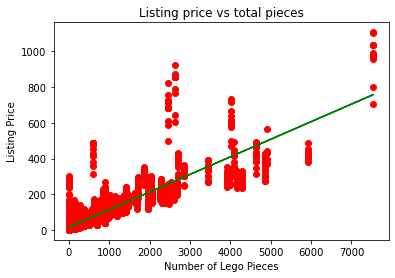

In [37]:
# [1] Create a scatterplot (with red data points).
plt.scatter(W_train, Z_train, color = "red")  
# [2] Create a regression line in green.
plt.plot(W_train, Z_pred, color = "green")
# [3] Set the title for the graph.  
plt.title("Listing price vs total pieces")
# [4] Set the label for the x-axis.  
plt.xlabel("Number of Lego Pieces")
# [5] Set the label for the y-axis.   
plt.ylabel("Listing Price") 
# [6] Print the graph. 
plt.show() 

In [ ]:
#Multiple Linear Regression

In [38]:
# dependent variable
y = Lego['list_price'] 
 # independent variables
X = Lego[['piece_count', 'ages' ]]

In [39]:
#Create and fit linear regression model, call predictions for X based on linear regression model
mlr = linear_model.LinearRegression()
mlr.fit(X, y)
mlr.predict(X)

array([44.23451228, 33.66784552, 24.5553072 , ..., 40.09246503,
       22.06566694, 27.97912265])

In [40]:
#Print Descriptive statistics
print('R-squared: ', mlr.score(X,y))
print('Intercept ', mlr.intercept_)
print('Coefficients: ')
list(zip(X, mlr.coef_))

R-squared:  0.7562637453438302
Intercept  16.79547480305044
Coefficients: 


[('piece_count', 0.09694189692265542), ('ages', 0.030849054183007332)]

In [41]:
# Find predicted value for items with 8000 pieces and geared towards people of age 30 
New_pieces = 8000
New_age = 30
print('Predicted value \n', mlr.predict([[New_pieces, New_age]]))

Predicted value 
 [793.25612181]


In [42]:
#Split the data into 80% train, 20% test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 5)

In [43]:
#Train the model 'using statsmodel' for train data
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
Y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:36:05   Log-Likelihood:                -51128.
No. Observations:                9808   AIC:                         1.023e+05
Df Residuals:                    9805   BIC:                         1.023e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.3233      1.075     15.179      

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
#Train the model 'using statsmodel' for test data
model2 = sm.OLS(Y_test, sm.add_constant(X_test)).fit()
Y_pred2 = model2.predict(sm.add_constant(X_train))
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     3603.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:36:05   Log-Likelihood:                -13031.
No. Observations:                2453   AIC:                         2.607e+04
Df Residuals:                    2450   BIC:                         2.609e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.8214      2.381      7.904      

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
print(mlr.score(X_test, Y_test)*100)

74.60174252496914


In [47]:
# Calculate mean absolute error
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error (Final): 21.90197310305527


In [48]:
#Assignment week 2 (Non Valid Anymore)

In [49]:
# Define the independent variable.
T = Lego 
# Define the dependent variable.
v = Lego['list_price'] 

In [50]:
le = LabelEncoder()

T['list_price'] = le.fit_transform(T['list_price'])

v = le.transform(v)

In [51]:
T.info()
T.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  int64  
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 670.6 KB


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,194,2,277,4.0,0,20
1,19,132,2,168,4.0,2,20
2,19,85,11,74,4.3,2,20
3,5,388,23,1032,3.6,0,20
4,5,341,14,744,3.2,1,20


In [52]:
# [1] Create an list with the column labels from X:
t_cols = T.columns
 
# [3] Create the object from ‘MinMaxScaler’.
ms = MinMaxScaler() 
# [4] Modify X to scale values between 0 and 1.
T = ms.fit_transform(T) 
# [5] Set X as equal to a new DataFrame.
T = pd.DataFrame(T, columns=[t_cols]) 

# [6] Check the contents of the modified DataFrame.
T.head() 

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,0.633333,0.265027,0.005450,0.036605,0.80,0.0,1.0
1,0.633333,0.180328,0.005450,0.022149,0.80,0.4,1.0
2,0.633333,0.116120,0.029973,0.009682,0.86,0.4,1.0
3,0.166667,0.530055,0.062670,0.136737,0.72,0.0,1.0
4,0.166667,0.465847,0.038147,0.098541,0.64,0.2,1.0


In [53]:
kmeans = KMeans(n_clusters=5, random_state=0)

# [3] Fit the k means to the data set. 
kmeans.fit(T)

KMeans(n_clusters=5, random_state=0)

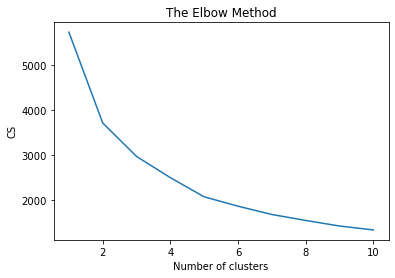

In [54]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(T)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [55]:
kmeans.cluster_centers_

array([[4.88289602e-01, 1.95251637e-01, 3.13867859e-02, 1.51644098e-02,
        8.88629738e-01, 8.46064140e-01, 2.40451895e-01],
       [7.75853613e-01, 4.23531285e-01, 2.74006190e-02, 7.48993859e-02,
        8.99264290e-01, 2.05998868e-02, 2.44284097e-01],
       [6.63548665e-01, 2.63127462e-01, 2.43738955e-02, 2.92456425e-02,
        8.75049096e-01, 3.94728682e-01, 7.58992248e-01],
       [6.60833801e-01, 2.54934276e-01, 2.42480832e-02, 2.86467686e-02,
        8.74694335e-01, 3.94503646e-01, 2.14105440e-01],
       [4.30316092e-01, 2.44407445e-01, 4.31621723e-04, 2.02274650e-02,
        2.15517241e-02, 9.80603448e-01, 2.29903017e-01],
       [7.84037559e-02, 2.35570633e-01, 2.59844542e-02, 3.23591621e-02,
        7.75991333e-01, 2.47020585e-01, 5.06663055e-01],
       [2.28173473e-01, 7.58264184e-01, 2.27454451e-01, 3.36257025e-01,
        8.59392213e-01, 1.40360874e-01, 4.98290598e-01],
       [4.87063875e-01, 1.96994096e-01, 3.15655070e-02, 1.55012237e-02,
        8.87568438e-01, 8

In [56]:
kmeans.inertia_ 

1332.2030992719617

In [57]:
# [1] Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=5, random_state=0)
# [2] Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(T) 

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(v == labels)

# [4] Display the accuracy score:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, v.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(v.size)))

Result: 1 out of 12261 samples were correctly labeled.
Accuracy score: 0.00


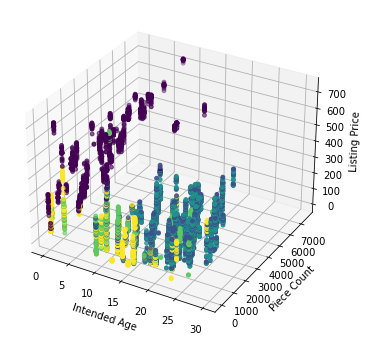

In [58]:
# [1] Create the figure area.
fig = plt.figure(figsize=(26,6)) 
# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(Lego['ages'], Lego['piece_count'], 
 Lego['list_price'], c=labels, s=15)

# [4] Set the label for each dimension:
ax.set_xlabel('Intended Age')
ax.set_ylabel('Piece Count')
ax.set_zlabel('Listing Price')

# [5] Show the plot.
plt.show() 

In [59]:
# Week 3

In [101]:
# Import Data Set

GR = pd.read_csv("game_reviews.csv")

In [102]:
# View Data Set was imported correctly

print(GR.shape)
print(GR.info())
print(GR.head())

(15000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB
None
   overall  verified   reviewTime      reviewerID        reviewerName  \
0        2     False  09 22, 2016  A1IDMI31WEANAF      Mackenzie Kent   
1        1     False  09 18, 2016   A4BCEVVZ4Y3V3  Jonathan Christian   
2        3      True  09 12, 2016  A2EZ9PY1IHHBX0     unpreparedtodie   
3        5      True  03 02, 2017  A139

In [103]:
#Identify missing values

GR_na = GR[GR.isna().any(axis=1)]
print(GR_na.shape)



GR_na = GR_na.drop(['image'], axis=1)
GR_na = GR_na[GR_na.isna().any(axis=1)]
print(GR_na.shape)
print(GR_na.head())


GR_na = GR_na.dropna()
print(GR.shape)

(14845, 9)
(12, 8)
      overall  verified   reviewTime      reviewerID     reviewerName  \
2052        5      True  01 09, 2017  A2QW2DUMM6SASS   Melinda Conger   
3226        4      True  01 16, 2016  A14AVEE0JY8TSY          Rebecca   
3952        5      True  12 27, 2017  A3IK63R1B3SRRA           Samuel   
4596        5     False  12 29, 2016  A20QY9XO4G3HUD  Margaret Heinen   
5603        5      True  06 29, 2015  A25UYV8MPSWNFP         Kimberly   

                             reviewText     summary  unixReviewTime  
2052                                NaN  Five Stars      1483920000  
3226  Fun game, great stocking stuffer!         NaN      1452902400  
3952                                NaN  Five Stars      1514332800  
4596                                NaN  Five Stars      1482969600  
5603                                NaN  Five Stars      1435536000  
(15000, 9)


In [104]:
#Drop empty column

GR = GR.drop(columns=['image'])

In [105]:
#Drop missing values

GR = GR.dropna()
print(GR.shape)

(14988, 8)


In [106]:
# Change review text to lowercase

GR['reviewText'] = GR['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
GR['reviewText'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

In [107]:
# Remove Punctuation

GR['reviewText'] = GR['reviewText'].str.replace('[^\w\s]','')
GR['reviewText'].head()

C:\Users\Alex\AppData\Local\Temp/ipykernel_9256/4153808838.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  GR['reviewText'] = GR['reviewText'].str.replace('[^\w\s]','')


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [108]:
# Check the number of duplicate values in the review Text column

GR.reviewText.duplicated().sum()



909

In [109]:
# Drop duplicates
GR = GR.drop_duplicates(subset=['reviewText'])

# Preview data
GR.reset_index(inplace=True)

print(GR.shape)
print(GR.head())

(14079, 9)
   index  overall  verified   reviewTime      reviewerID        reviewerName  \
0      0        2     False  09 22, 2016  A1IDMI31WEANAF      Mackenzie Kent   
1      1        1     False  09 18, 2016   A4BCEVVZ4Y3V3  Jonathan Christian   
2      2        3      True  09 12, 2016  A2EZ9PY1IHHBX0     unpreparedtodie   
3      3        5      True  03 02, 2017  A139PXTTC2LGHZ              Ashley   
4      4        1      True  02 08, 2017  A3IB33V29XIL8O            Oghma_EM   

                                          reviewText  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  unixReviewTime  
0  The fact that 50% of this space is wasted on a...      1474502400  
1  Another worthless Dungeon 

In [110]:
# String all the comments together in a single variable
all_comments = ''
for i in range(GR.shape[0]):
    all_comments = all_comments + GR['reviewText'][i]

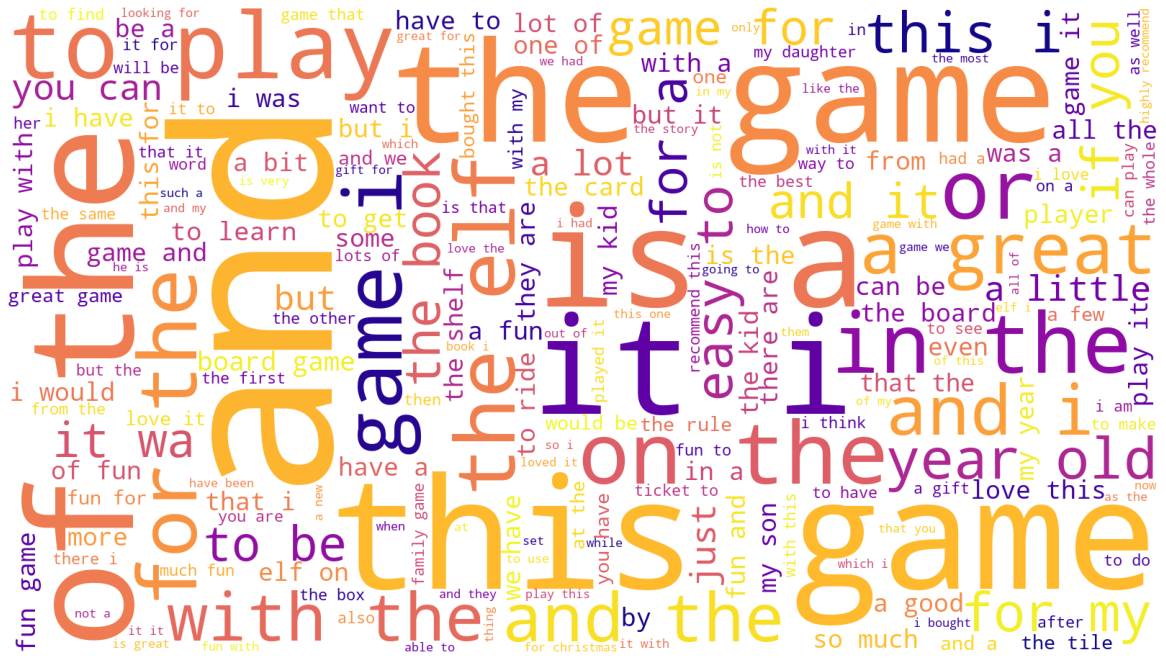

In [70]:
#Set colour codes
sns.set(color_codes=True)

#Set Word Cloud Parameters
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [74]:
#Tokenize reviews

GR['tokens'] = GR['reviewText'].apply(word_tokenize)
GR['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [75]:
# Combine all tokens into one list

all_tokens = []
for i in range(GR.shape[0]):
    all_tokens = all_tokens + GR['tokens'][i]

In [76]:
#Find tokens with maximum frequency
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12845, 'game': 12379, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [77]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
english_stopwords = set(stopwords.words('english'))

tokens1 = [word for word in all_tokens if word.isalnum()]

In [78]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

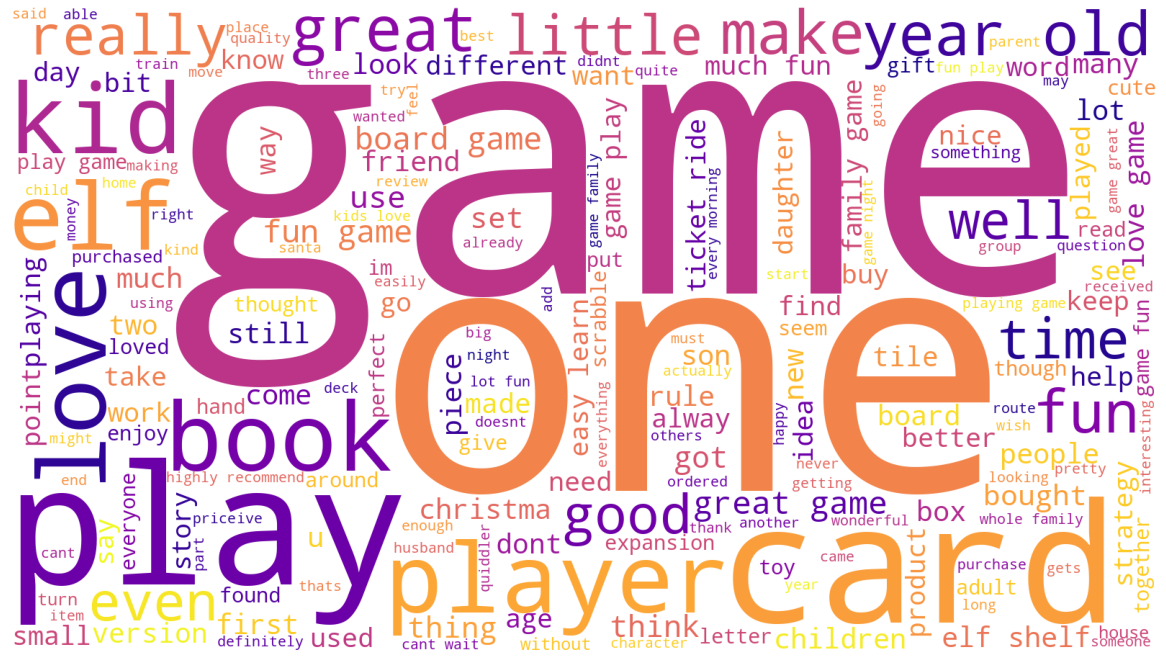

In [81]:
#Visualise Tokens
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '
    
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [82]:
# View the frequency distribution
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 12379, 'fun': 5188, 'play': 4150, 'great': 4098, 'elf': 3285, 'love': 3031, 'one': 2982, 'family': 2818, 'kids': 2499, 'like': 2278, ...})

In [83]:
#Display summary of frequency of words
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,12379
fun,5188
play,4150
great,4098
elf,3285
love,3031
one,2982
family,2818
kids,2499


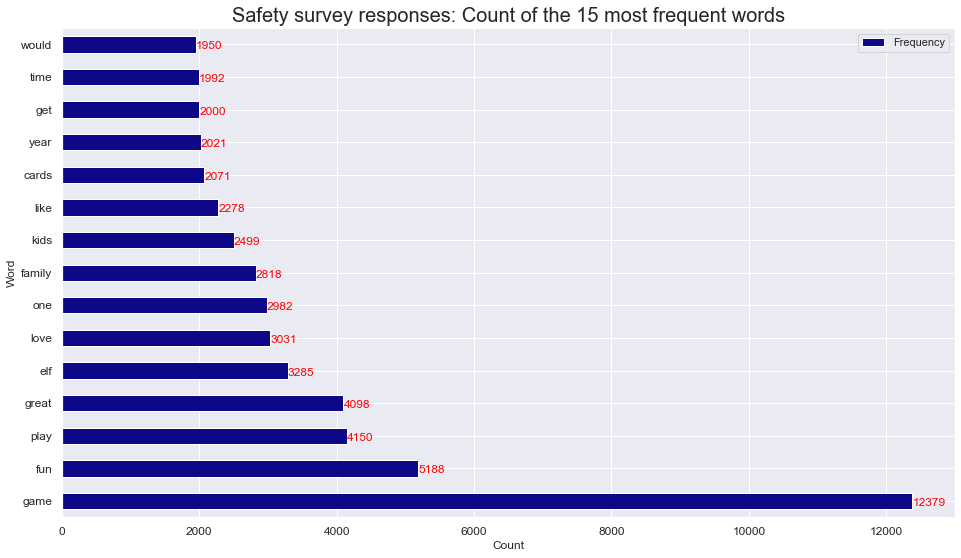

In [85]:
# Generate bar graph to view frequency distribution
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words", fontsize=20)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

In [112]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
GR['polarity'] = GR['reviewText'].apply(generate_polarity)

# [3] Preview the result.
GR['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

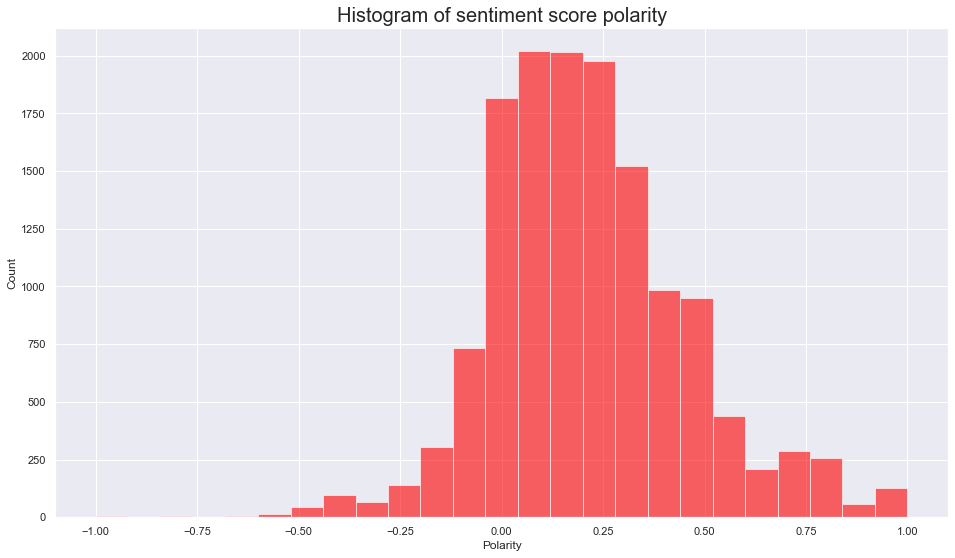

In [115]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(GR['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();

In [118]:
GR.columns
print(GR.head())

   index  overall  verified   reviewTime      reviewerID        reviewerName  \
0      0        2     False  09 22, 2016  A1IDMI31WEANAF      Mackenzie Kent   
1      1        1     False  09 18, 2016   A4BCEVVZ4Y3V3  Jonathan Christian   
2      2        3      True  09 12, 2016  A2EZ9PY1IHHBX0     unpreparedtodie   
3      3        5      True  03 02, 2017  A139PXTTC2LGHZ              Ashley   
4      4        1      True  02 08, 2017  A3IB33V29XIL8O            Oghma_EM   

                                          reviewText  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  unixReviewTime  polarity  
0  The fact that 50% of this space is wasted on a...      1474502400 -0.036111  
1  Another worthless

In [129]:
# Extract 20 most positive scores
positive_sentiment = GR.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['index', 'reviewText', 'polarity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})



,index,reviewText,polarity
7,7,came in perfect condition,1.000000
164,165,awesome book,1.000000
193,194,awesome gift,1.000000
489,496,excellent activity for teaching selfmanagement skills,1.000000
517,524,perfect just what i ordered,1.000000
583,591,wonderful product,1.000000
601,609,delightful product,1.000000
613,621,wonderful for my grandson to learn the resurrection story,1.000000
782,790,perfect,1.000000
922,933,awesome,1.000000


In [127]:
# Save file as csv

positive_sentiment.to_csv(index=True)

compression_opts = dict(method='zip',
                        archive_name='positive.csv')  
positive_sentiment.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [121]:
# Extract 20 most negative scores
negative_sentiment = GR.nsmallest(20, 'polarity')

# [2] Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['index', 'reviewText', 'polarity']]

# [3] Adjust the column width.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,index,reviewText,polarity
207,208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
1987,2043,kids did not like it thought it was boring,-1.000000
3217,3359,some of the suggestions are disgusting,-1.000000
7811,8319,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,-1.000000
7514,7988,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000
8860,9511,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000
8197,8758,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667
12384,13181,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000
8530,9143,cliche and stupid i should not drink and amazon,-0.800000
8637,9260,just stupid,-0.800000


In [128]:
# Save file as csv

negative_sentiment.to_csv(index=True)

compression_opts = dict(method='zip',
                        archive_name='negative.csv')  
negative_sentiment.to_csv('out.zip', index=False,
          compression=compression_opts) 